In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 20)
sns.set(font='Malgun Gothic')
%matplotlib inline

In [43]:
df_raw = pd.read_csv("./data/온라인쇼핑몰_취급상품범위_상품군별거래액_20200918174526.csv", encoding='cp949')

In [44]:
df_raw[(df_raw['상품군별']=='여행 및 교통서비스') & (df_raw['범위별']=='계')]

,상품군별,범위별,2017. 01,2017. 02,2017. 03,2017. 04,2017. 05,2017. 06,2017. 07,2017. 08,...,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06 p),2020. 07 p)
54,여행 및 교통서비스,계,1215463,1110440,1072596,1134841,1181895,1210908,1379402,1406339,...,1433122,1440160,1568794,1541603,710501,363297,440571,557450,598033,777926


In [7]:
df_raw

,상품군별,범위별,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06 p),2020. 07 p)
0,합계,계,11963252,12624728,12065537,12742648,12684409,12962537
1,합계,종합몰,8298602,8794625,8355865,8787440,8608956,8810334
2,합계,전문몰,3664650,3830103,3709672,3955208,4075453,4152203
3,컴퓨터 및 주변기기,계,616468,687759,645276,590327,535105,608869
4,컴퓨터 및 주변기기,종합몰,433042,468165,442051,373997,330571,371595
...,...,...,...,...,...,...,...,...
67,기타서비스,종합몰,116932,43739,94240,64995,66095,75473
68,기타서비스,전문몰,28692,20803,20293,24891,28176,23837
69,기타,계,380936,387031,318471,389398,365383,389308
70,기타,종합몰,329601,319068,265118,340324,313961,337107


In [45]:
df = df_raw.melt(id_vars=['상품군별', '범위별'], var_name='기간', value_name='백만원').copy()

In [46]:
df['연도'] = df['기간'].map(lambda x : x.split()[0].split('.')[0])
df['월'] = df['기간'].map(lambda x : x.split()[1])

In [47]:
df_sample = df.copy()

In [48]:
df_sample.isnull().sum()

상품군별    0
범위별     0
기간      0
백만원     0
연도      0
월       0
dtype: int64

In [27]:
df['상품군별'].unique()

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품', '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스',
       'e쿠폰서비스', '음식서비스', '기타서비스', '기타'], dtype=object)

In [49]:
df_product = df_sample[(~df_sample['상품군별'].isin(['합계'])) & (df_sample['범위별'].isin(['계']))]

In [50]:
df_product

,상품군별,범위별,기간,백만원,연도,월
3,컴퓨터 및 주변기기,계,2017. 01,422384,2017,01
6,가전·전자·통신기기,계,2017. 01,602122,2017,01
9,서적,계,2017. 01,151230,2017,01
12,사무·문구,계,2017. 01,53192,2017,01
15,의복,계,2017. 01,864515,2017,01
...,...,...,...,...,...,...
3081,문화 및 레저서비스,계,2020. 07 p),62969,2020,07
3084,e쿠폰서비스,계,2020. 07 p),332111,2020,07
3087,음식서비스,계,2020. 07 p),1378014,2020,07
3090,기타서비스,계,2020. 07 p),99310,2020,07


In [37]:
len(df_product['상품군별'].unique())

23

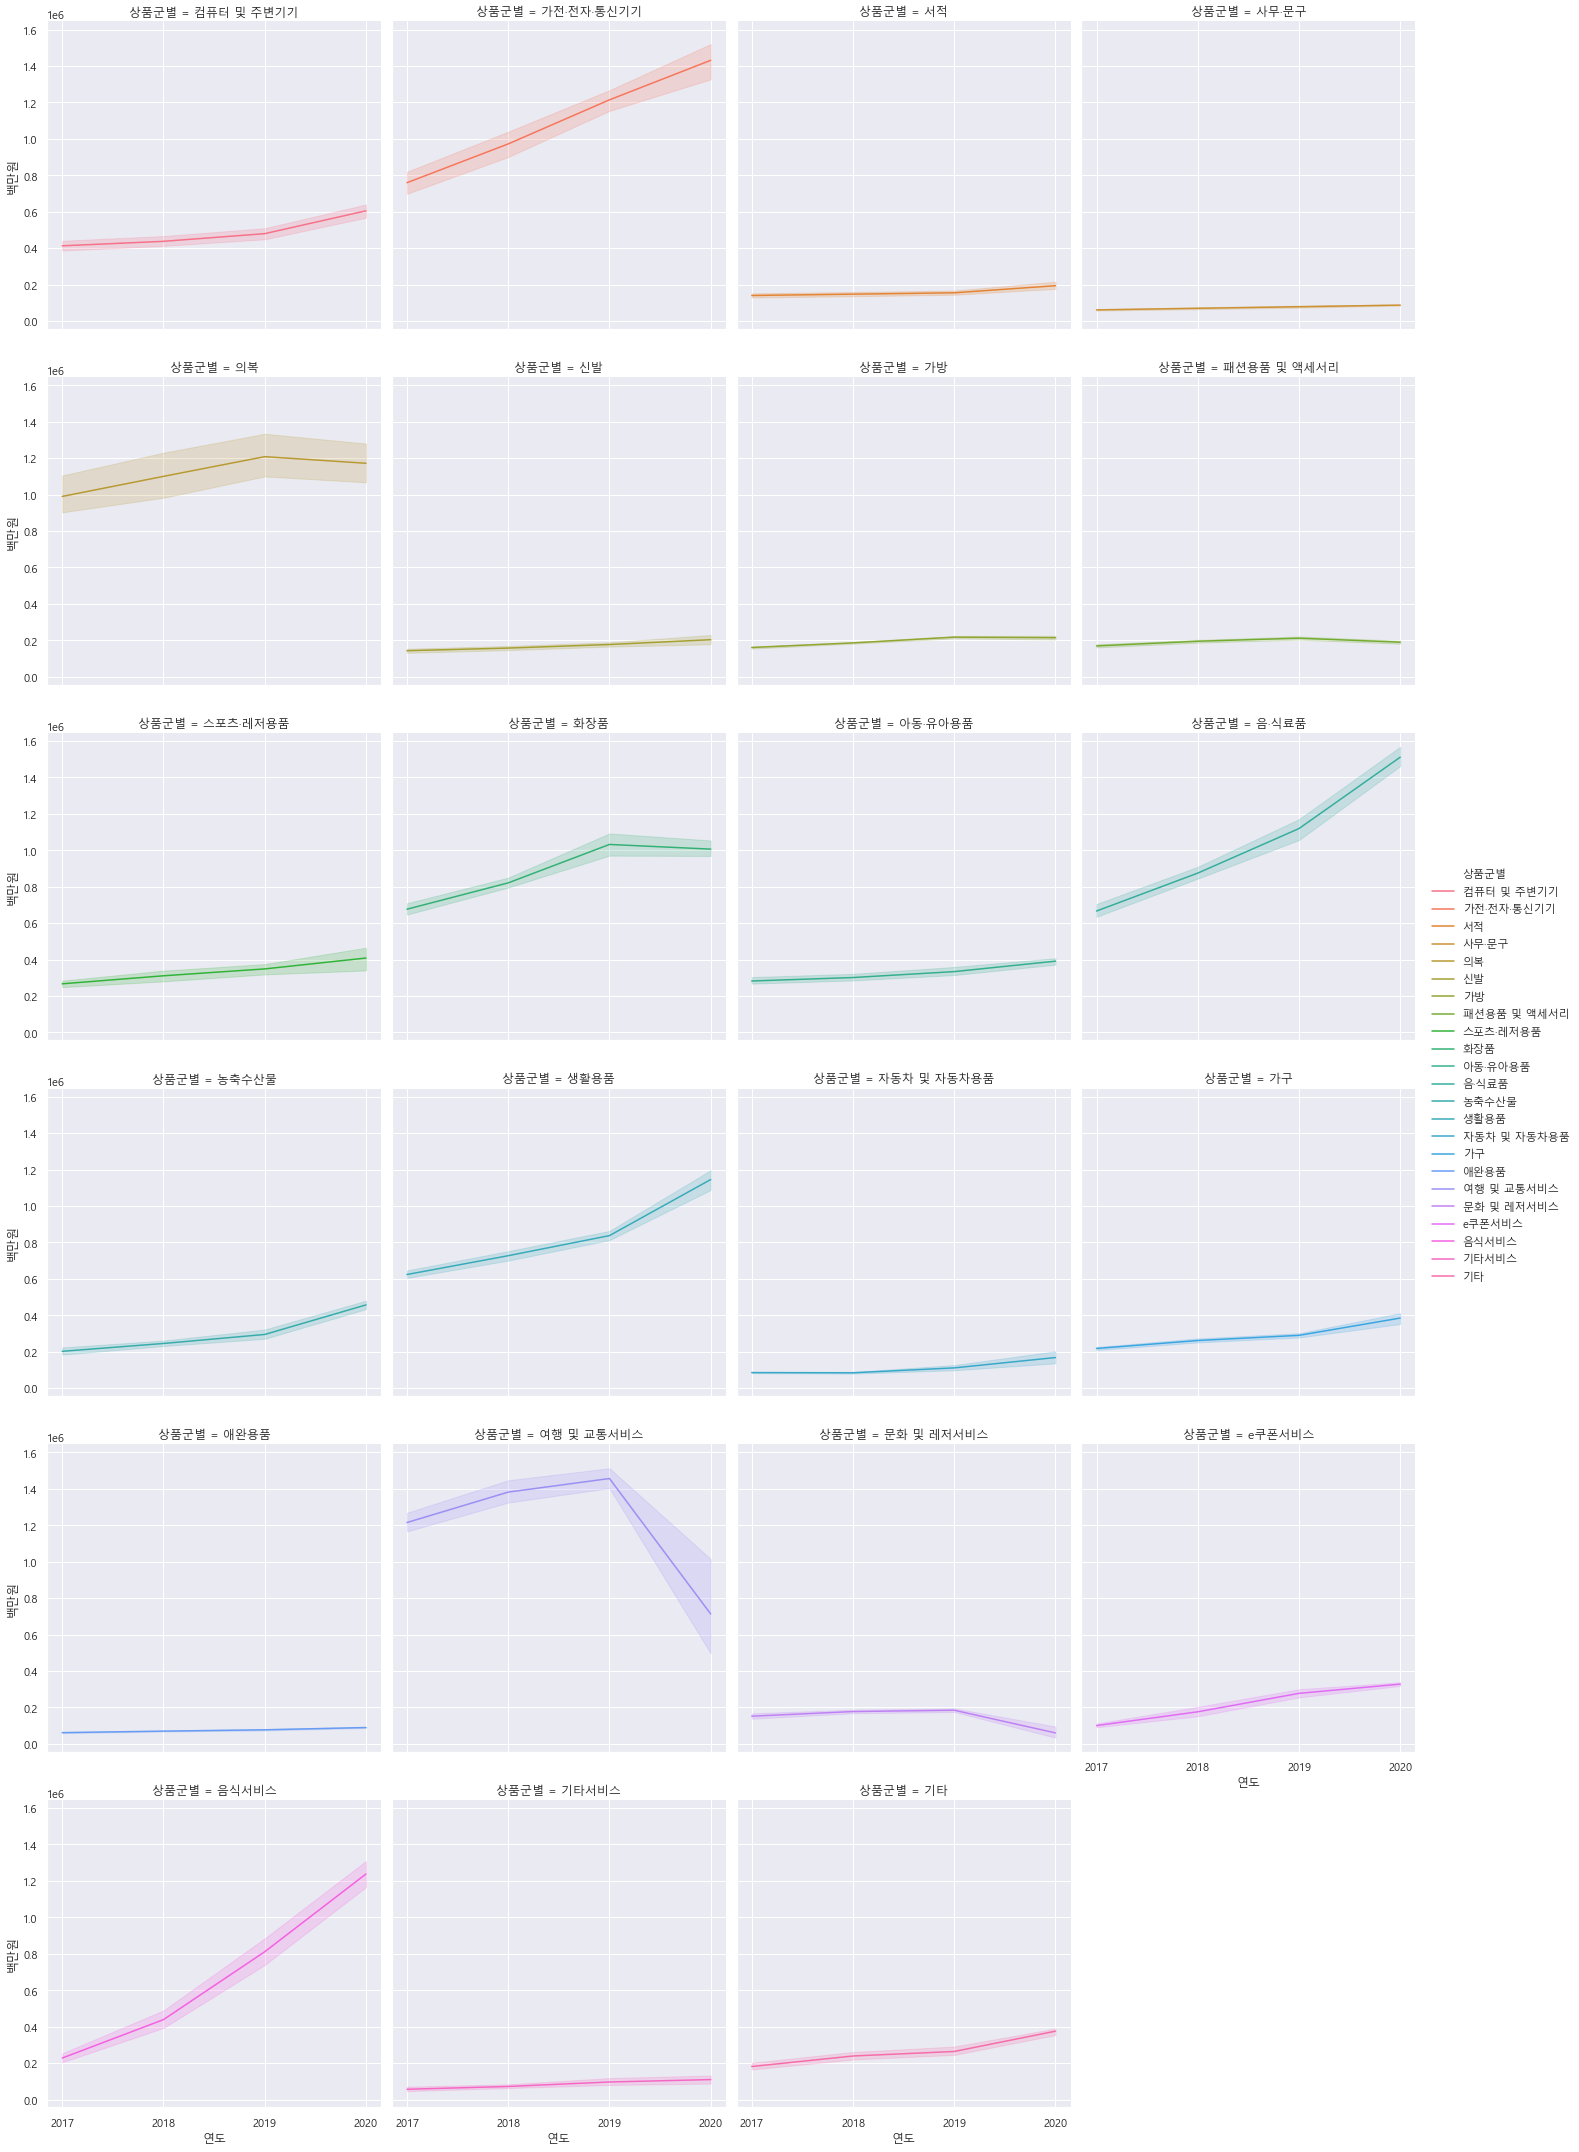

In [52]:
sns.relplot(data=df_product, x='연도', y='백만원', hue='상품군별',  kind='line', col='상품군별', col_wrap=4)